# KNN
- Iris dataset
- 2 features
- Multiclass

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from PlotFunction import plot_decision_surface_train_test
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import os
imagePath = os.path.join(os.getcwd(),'Images')
if (not(os.path.isdir(imagePath))):
    os.mkdir(imagePath)

In [3]:
# Read data
iris = datasets.load_iris()

In [4]:
# Extract the last 2 columns
X = iris.data[:, 2:4]
y = iris.target

In [5]:
# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

In [6]:
# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
param = "ex4"
paramSetAll = {
    "ex1": {"n_neighbors": 1, "p": 2, "algorithm": "auto",},
    "ex2": {"n_neighbors": 3, "p": 2, "algorithm": "auto",},
    "ex3": {"n_neighbors": 5, "p": 2, "algorithm": "auto",},
    "ex4": {"n_neighbors": 5, "p": 1, "algorithm": "auto",},
}
paramValue = paramSetAll[param]

In [8]:
# Creating objects
clf = KNeighborsClassifier(**paramValue)

In [9]:
# Training
clf.fit(X_train_std, y_train)

KNeighborsClassifier(p=1)

In [10]:
# Prediction
y_pred = clf.predict(X_test_std)

In [11]:
# Misclassification from the test samples
sumMiss = (y_test != y_pred).sum()

In [12]:
# Accuracy score from the test samples
accuracyScore = accuracy_score(y_test, y_pred)

In [13]:
print(f"Misclassified examples: {sumMiss}")
print(f"Accuracy score: {accuracyScore}")

Misclassified examples: 1
Accuracy score: 0.9777777777777777


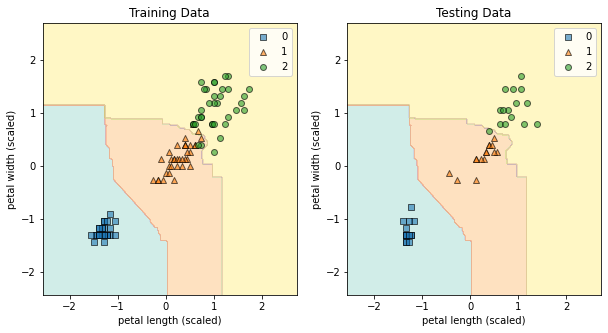

In [14]:
filenamePNG = "Images/T61_DT_" + param + ".png"
plot_decision_surface_train_test(
    X_train_std, X_test_std, y_train, y_test, clf, filename=filenamePNG
)